In [395]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [396]:
def show_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig = plt.figure(frameon=False)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    

In [397]:
def Threshold_hsv(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_lava = np.array([0,100,100])
    upper_lava = np.array([50,255,255])
    mask = cv2.inRange(hsv, lower_lava, upper_lava)
    _, mask2 = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    return mask2

def Closing(mask):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
    closed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return closed_mask

def poly_enclose(closed_mask):
    contours, _ = cv2.findContours(closed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    epsilon = 0.0009 * cv2.arcLength(largest_contour, True)
    enc_poly = cv2.approxPolyDP(largest_contour, epsilon, True)

    return enc_poly

def show_contour(img, contour):
    ((x, y), radius) = cv2.minEnclosingCircle(contour)
    cv2.circle(img, (int(x), int(y)), int(radius), (0, 255, 0), 2)
    show_image(img)

def find_sun(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(blurred)
    if(maxVal < 230):
        return 0

    _, thresholded = cv2.threshold(blurred, maxVal-1, 255, cv2.THRESH_BINARY)

    thresholded = cv2.erode(thresholded, None, iterations=2)
    thresholded = cv2.dilate(thresholded, None, iterations=4)

    contours, _ = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if(len(contours) == 0):
        return 0

    # print(maxVal, '#########################')
    largest_contour = max(contours, key=cv2.contourArea)

    if(cv2.contourArea(largest_contour) < 270):
        return 0
    # print(cv2.contourArea(largest_contour), '////////////////')
    # show_contour(img.copy(), largest_contour)
    
    return 1

In [398]:
def solution(image_path):
    image = cv2.imread(image_path)
    show_image(image)
    if(find_sun(image) == 1):
        return np.zeros_like(image)
    mask = Threshold_hsv(image)
    
    closed_mask=Closing(mask)

    enc_poly = poly_enclose(closed_mask)

    # Create a mask with the polygon
    polygon_mask = np.zeros_like(closed_mask)
    cv2.drawContours(polygon_mask, [enc_poly], -1, 255, thickness=cv2.FILLED)
    ret=cv2.cvtColor(polygon_mask,cv2.COLOR_GRAY2RGB)

    ######################################################################  
    return ret

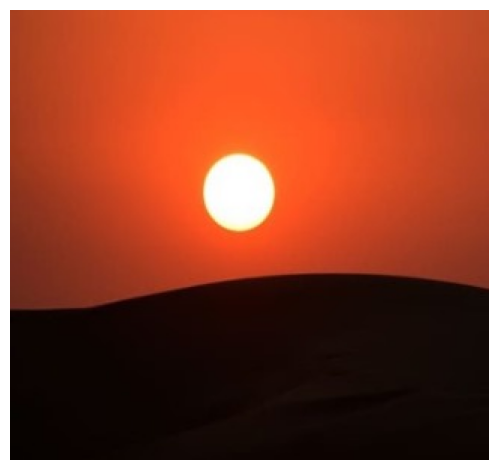

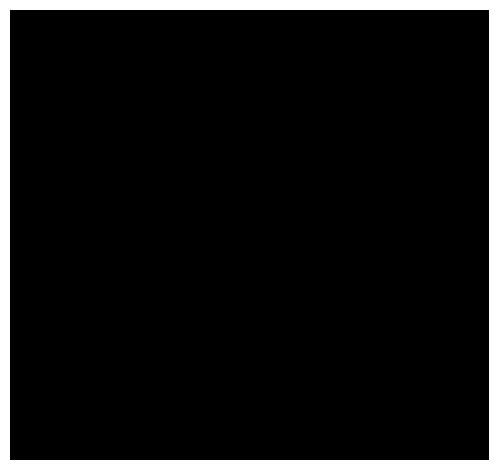

In [399]:
show_image(solution('test/sun.jpg'))

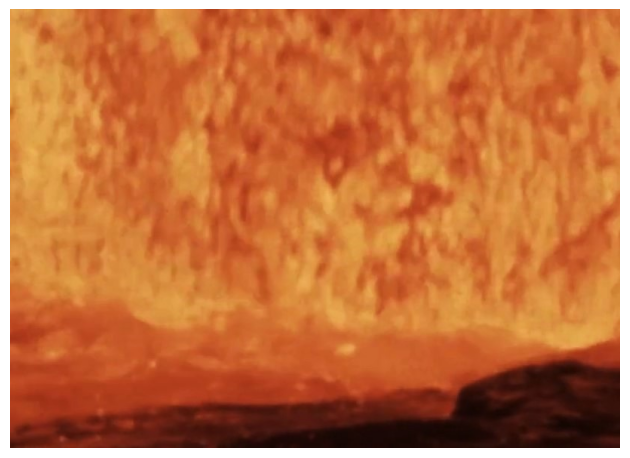

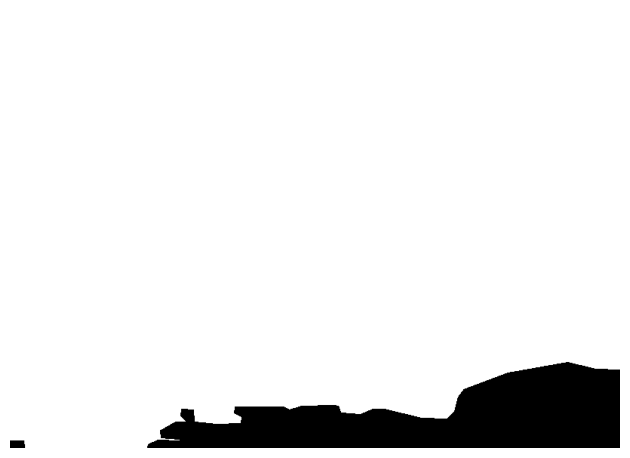

In [400]:
show_image(solution('test/lava2.jpg'))

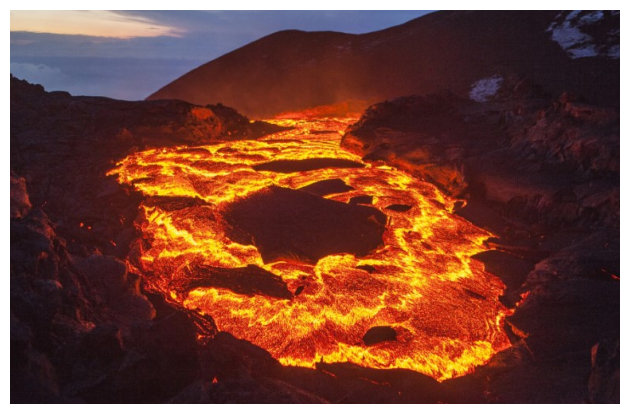

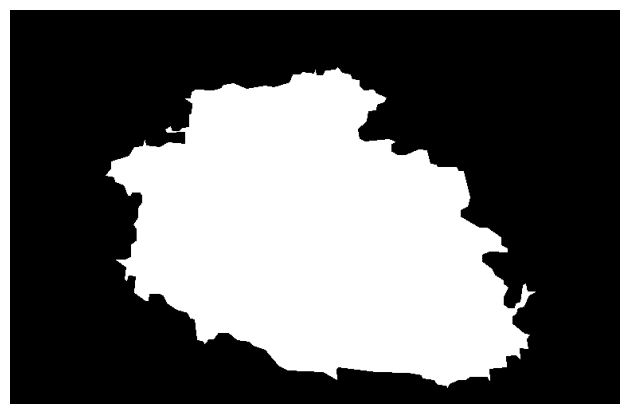

In [401]:
show_image(solution('test/lava20.jpg'))

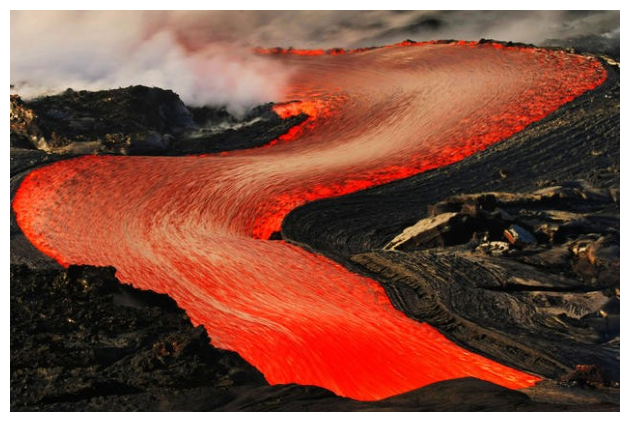

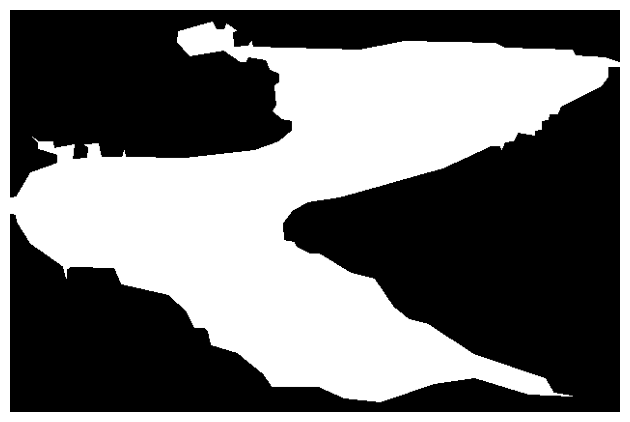

In [402]:
show_image(solution('test/lava21.jpg'))

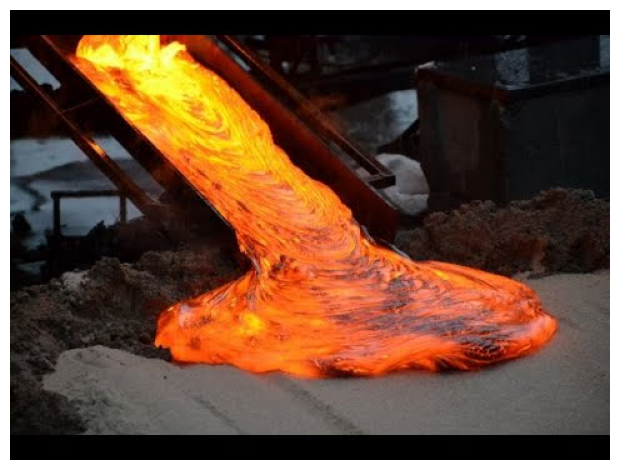

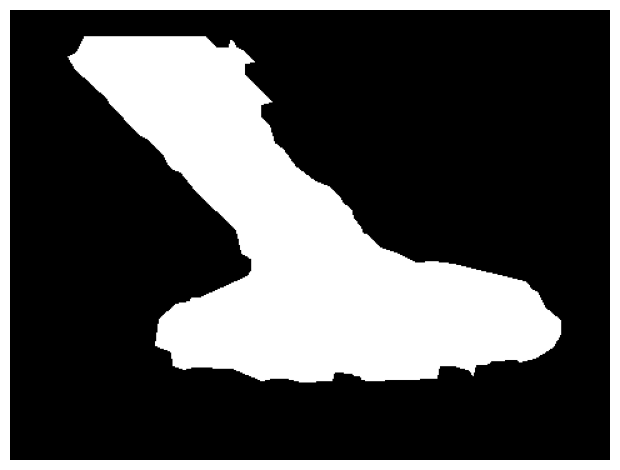

In [403]:
show_image(solution('test/lava31.jpg'))

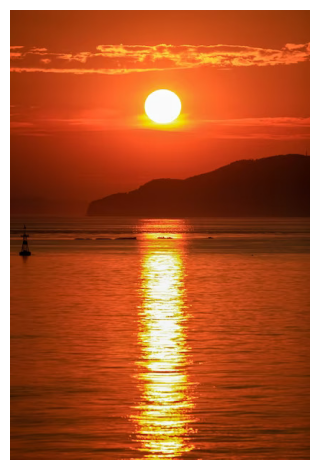

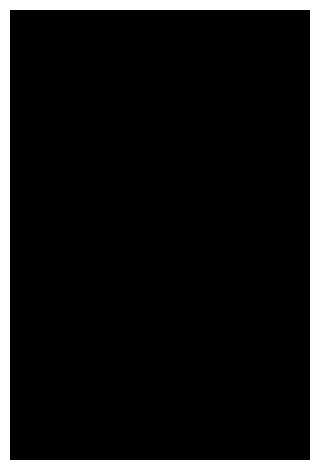

In [404]:
show_image(solution('test/lava41.jpg'))